In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
#loading the dataset
dataset=pd.read_csv('skydata.csv')
dataset.head()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,class,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,STAR,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,GALAXY,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,STAR,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,STAR,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,GALAXY,302,301,17.21479,51615


In [4]:
#exploratory data analysis
#the output showed that no null values,so no null values to handle
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        80000 non-null  float64
 1   u          80000 non-null  float64
 2   redshift   80000 non-null  float64
 3   z          80000 non-null  float64
 4   r          80000 non-null  float64
 5   ra         80000 non-null  float64
 6   run        80000 non-null  int64  
 7   specobjid  80000 non-null  uint64 
 8   field      80000 non-null  int64  
 9   plate      80000 non-null  int64  
 10  camcol     80000 non-null  int64  
 11  g          80000 non-null  float64
 12  objid      80000 non-null  int64  
 13  class      80000 non-null  object 
 14  fiberid    80000 non-null  int64  
 15  rerun      80000 non-null  int64  
 16  i          80000 non-null  float64
 17  mjd        80000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 11.0+ MB


In [5]:
dataset.describe()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.0,80000.000000,80000.000000
mean,24.956199,18.599217,0.044789,16.249336,16.688952,177.743131,3959.174013,2.752467e+18,187.312775,2444.599575,3.275537,17.255286,1.237662e+18,336.434625,301.0,16.417453,53832.966075
std,20.684056,0.850213,0.053003,1.144420,1.013888,77.896889,1673.864207,2.247970e+18,141.263033,1996.584854,1.623022,0.906773,7.189191e+12,212.623680,0.0,1.074750,1441.947194
min,-19.495456,10.611810,-0.004136,8.947795,9.005167,0.013061,109.000000,2.994897e+17,11.000000,266.000000,1.000000,9.988000,1.237646e+18,1.000000,301.0,8.848403,51608.000000
25%,6.592120,18.151283,-0.000033,15.533245,16.112177,135.892460,2826.000000,1.334297e+18,85.000000,1185.000000,2.000000,16.763295,1.237658e+18,158.000000,301.0,15.781940,52731.000000
50%,23.710118,18.836250,0.033506,16.264470,16.754960,180.537028,3900.000000,2.319509e+18,153.000000,2060.000000,3.000000,17.414850,1.237662e+18,324.000000,301.0,16.453590,53712.000000
75%,40.306610,19.253073,0.078770,16.994713,17.392215,224.576979,5060.000000,3.221323e+18,249.000000,2861.000000,5.000000,17.907175,1.237667e+18,496.000000,301.0,17.129413,54567.000000
max,84.490494,19.599950,1.945427,29.383740,31.990100,359.973933,8162.000000,1.314852e+19,982.000000,11678.000000,6.000000,19.996050,1.237681e+18,1000.000000,301.0,32.101780,58543.000000


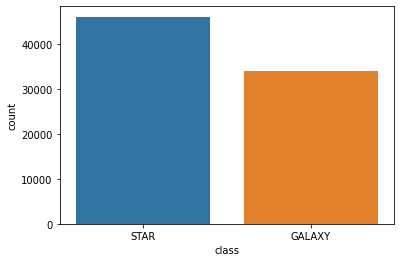

In [6]:
#showing the classes distribution
sns.countplot(x='class',data=dataset)
#the data is bit unbalanced 

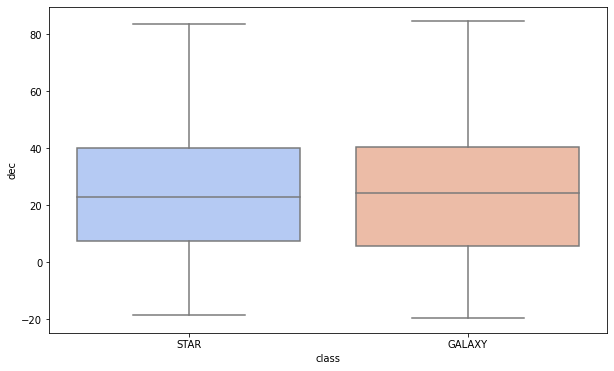

In [7]:
#Study the relation between features
#boxplot to visualize the distribution to compare between the data of the 2 classes
plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='dec',data=dataset,palette='coolwarm')

In [8]:
#finding correlation between attributes
dataset.corr()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd
dec,1.000000,-0.030495,-0.008326,-0.006385,-0.016748,0.070963,-0.042750,0.023312,-0.113482,0.023311,0.080412,-0.024250,-0.042740,0.028424,NaN,-0.012545,0.031367
u,-0.030495,1.000000,0.352089,0.567123,0.721655,0.028434,0.001328,-0.028518,0.013576,-0.028518,0.008498,0.882289,0.001329,0.009929,NaN,0.634740,-0.044040
redshift,-0.008326,0.352089,1.000000,-0.071623,0.083970,0.045046,-0.076495,-0.306931,0.041802,-0.306932,-0.008455,0.237847,-0.076496,-0.060444,NaN,-0.010258,-0.339693
z,-0.006385,0.567123,-0.071623,1.000000,0.948813,0.010216,0.009656,0.206943,-0.001607,0.206942,0.015454,0.854859,0.009658,0.077821,NaN,0.971675,0.193136
r,-0.016748,0.721655,0.083970,0.948813,1.000000,0.024205,0.000412,0.138990,0.006372,0.138990,0.015579,0.945172,0.000414,0.063555,NaN,0.970947,0.118600
ra,0.070963,0.028434,0.045046,0.010216,0.024205,1.000000,-0.059761,-0.046675,0.021628,-0.046675,-0.007463,0.030012,-0.059762,-0.025357,NaN,0.017420,-0.017603
run,-0.042750,0.001328,-0.076495,0.009656,0.000412,-0.059761,1.000000,0.345190,-0.172088,0.345190,0.000894,-0.000610,1.000000,0.086910,NaN,0.005777,0.393987
specobjid,0.023312,-0.028518,-0.306931,0.206943,0.138990,-0.046675,0.345190,1.000000,-0.057366,1.000000,0.015534,0.074788,0.345192,0.256959,NaN,0.182568,0.957403
field,-0.113482,0.013576,0.041802,-0.001607,0.006372,0.021628,-0.172088,-0.057366,1.000000,-0.057366,-0.078103,0.012381,-0.172096,-0.021289,NaN,0.001435,-0.063734
plate,0.023311,-0.028518,-0.306932,0.206942,0.138990,-0.046675,0.345190,1.000000,-0.057366,1.000000,0.015527,0.074788,0.345192,0.256935,NaN,0.182568,0.957404


In [9]:
#to check unique values present in columns which will help later in reducing dimensionality by dropping features

for i in dataset.keys():
    print("Colname:=",i)
    print(dataset[i].unique())

Colname:= dec
[ 2.80316978 23.89166573 14.32335749 ... 29.38591299 66.7733615
 18.62077111]
Colname:= u
[19.35065 17.57148 18.30611 ... 19.36814 18.62474 18.67949]
Colname:= redshift
[1.422651e-01 3.192928e-05 7.397559e-02 ... 5.763714e-02 6.007426e-05
 7.722810e-04]
Colname:= z
[16.32664 15.88743 15.00599 ... 15.652   15.79832 17.3196 ]
Colname:= r
[17.04886 16.04065 15.73859 ... 16.30223 16.14084 17.42544]
Colname:= ra
[182.89846639 270.24085044 138.91388461 ... 116.23859359 117.91003705
 159.82362115]
Colname:= run
[1458 4832 5935 2986 6793 2964 1239 4550 3705 3893 3716 1739 4002 4849
 5330 4674 3723 3958 2507 5115 3842 4829 2125 1412 2243 5326 3704 4874
 5976 4512 3926 6004 4851 3225 5360 3804 2126 4010 5194 1140 2248 6182
 4294 3712 1740 2826 1045 3996 4382 1729 5409 5972 3606 4670 3971 1350
 6162 3841 2883 4264 8096 4576 3927 4552 3438 2830 5183 4517 3664 8097
 7941 4263 4678 7917 6161 5137  752 3015 2961 7885 3226 2190 1462 5636
 2728 2662 2247 5061 5314 6585 7717 4671 4858 1992

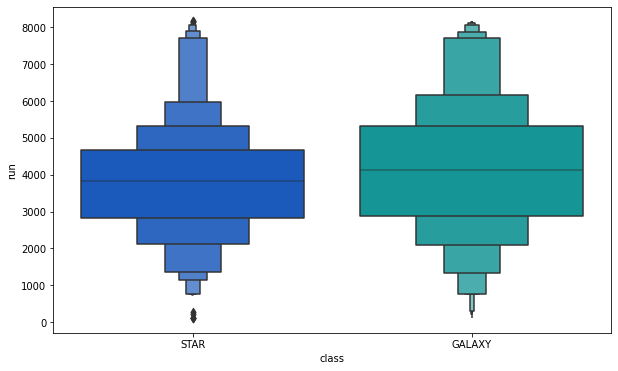

In [10]:
#start to see the relation of the attributes with good correlation
plt.figure(figsize=(10,6))
sns.boxenplot(x='class',y='run',data=dataset,palette='winter')

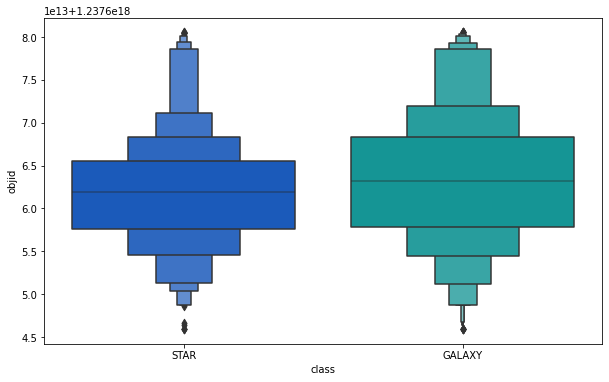

In [11]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='class',y='objid',data=dataset,palette='winter')

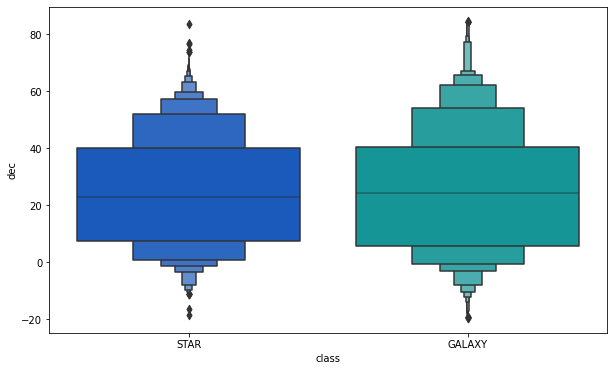

In [12]:
#test correlation of 'dec' feature
plt.figure(figsize=(10,6))
sns.boxenplot(x='class',y='dec',data=dataset,palette='winter')

In [13]:
#changing the dictionary to be in numerical form that 'Star' class will be '1' and 'Galaxy' class will be '2'
dictionary={'STAR':1,'GALAXY':2}
dataset.replace({'class':dictionary},inplace=True)

In [14]:
y = dataset['class']

In [15]:
#dropping the rerun feature
dataset = dataset.drop(['class','rerun'], axis=1)

In [16]:
#scaling the training data 
scaler = MinMaxScaler()
sc = scaler.fit_transform(dataset)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size=0.2, random_state=2)

In [18]:
#random Forest classifier
#I choosed random forest classifier as it is good with high dimesnional data as the random forest classifier  divides data to small subsets
#so it is faster to train and ca easily work with alot of features 
#but also must say the fact that the data is a bit unbalanced quietly affect the results
rf = RandomForestClassifier(max_depth=15, n_estimators=120)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of RandomForestClassifier = ", accuracy_score(y_test,y_pred))

Accuracy of RandomForestClassifier =  0.9970625
